### CardioVascularDisease

#### Problem statement

To build an application to classify the patients to be healthy or suffering from cardivasculardisease based on the given attributes

#### CardioVasculardisease

Cardiovascular disease (CVD) is a class of diseases that involve the heart or blood vessels. CVD includes coronary artery diseases (CAD) such as angina and myocardial infarction (commonly known as a heart attack).

#### Features:

1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
13. All of the dataset values were collected at the moment of medical examination.

You can download the dataset here:https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

#### Steps involved
1. Data Loading.
2. Exploratory Data Analysis.
3. Feature Engineering.
4. Feature selection.
5. Feature transformation
6. Model Buiding.
7. Model Evaluation.
8. Predictions.
9. Model Deployment

##### Import the libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image
import seaborn as sns
%matplotlib inline

#### 1. Data Loading

In [19]:
data=pd.read_csv(r"C:\Users\Praneeth\Downloads\Ineuron Hakethon\CardioVascularDisease\CardioVascularDisease\cardio_train.csv",sep=(';'))
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [20]:
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69300,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


#### 2. Exploratory Data Analysis

In [21]:
#Get the size of the data
print('No of recored of the data: {}'.format(data.shape[0]))
print('No of variables on the data: {}'.format(data.shape[1]))

No of recored of the data: 69301
No of variables on the data: 13


In [22]:
#Check the mean,std,min etc values 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,69301.0,50471.480397,28563.100347,988.0,25745.0,50494.0,75150.0,99999.0
age,69301.0,19468.786280,2467.261818,10798.0,17664.0,19704.0,21326.0,23713.0
gender,69301.0,1.349519,0.476821,1.0,1.0,1.0,2.0,2.0
height,69301.0,164.362217,8.205337,55.0,159.0,165.0,170.0,250.0
weight,69301.0,74.203027,14.383469,10.0,65.0,72.0,82.0,200.0
ap_hi,69301.0,128.829584,154.775805,-150.0,120.0,120.0,140.0,16020.0
ap_lo,69301.0,96.650092,189.096240,-70.0,80.0,80.0,90.0,11000.0
cholesterol,69301.0,1.366806,0.680270,1.0,1.0,1.0,2.0,3.0
gluc,69301.0,1.226447,0.572246,1.0,1.0,1.0,1.0,3.0
smoke,69301.0,0.088051,0.283371,0.0,0.0,0.0,0.0,1.0


In [23]:
#Details of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [24]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [25]:
#Check if any null values are in the data
data.isnull().any()

id             False
age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

Hence, there is no missing values in the data, then we go ahead

#### Numerical features are two types;
1. Discreate features
2. Countineous features

In [26]:
#Numerical values
num_data=[feature for feature in data.columns if data[feature].dtype != 'O']
print('Number of numerical features: {}'.format(len(num_data)))

Number of numerical features: 13


In [27]:
#Discrete features
discrete_data=[feature for feature in num_data if len(data[feature].unique())<25 and feature not in 'id']
discrete_data

['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

In [28]:
discre_d1=data[discrete_data]

In [29]:
def plot_data(variable,data):
    g=sns.barplot(data[variable].value_counts().index,data[variable].value_counts().values)
    g.set_title(variable)
    plt.show()

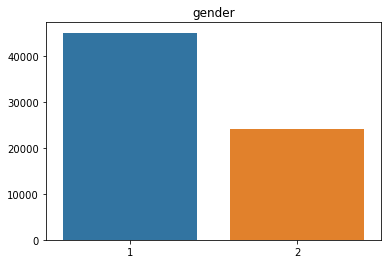

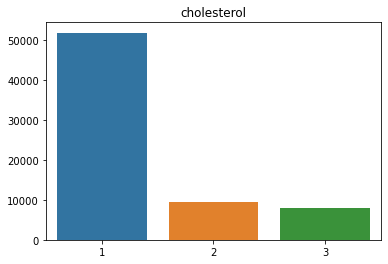

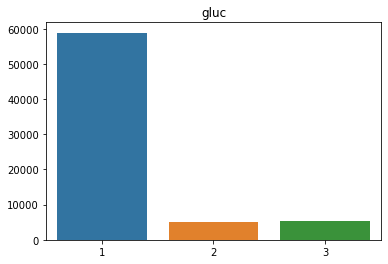

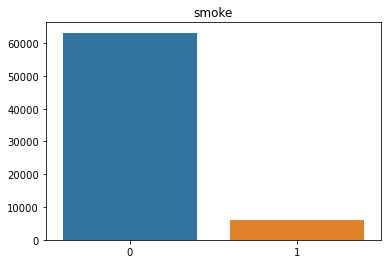

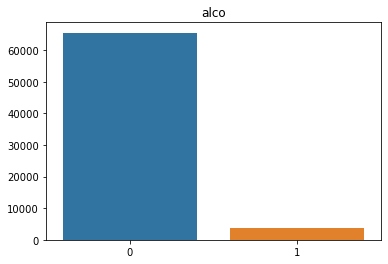

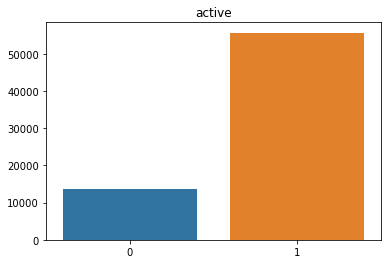

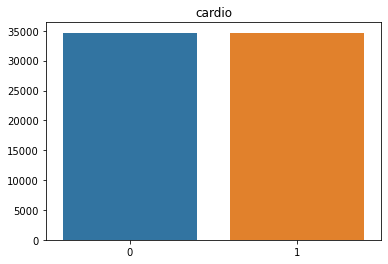

In [30]:
for feature in discre_d1:
    plot_data(feature,data)

In [31]:
#Countinoues features
countinue_data=[feature for feature in num_data if feature not in discrete_data +['id']]

In [32]:
cont_data=data[countinue_data]

In [33]:
def plot_dist(variable,data):
    sns.distplot(data[variable])
    plt.show()

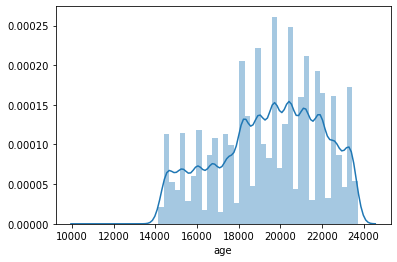

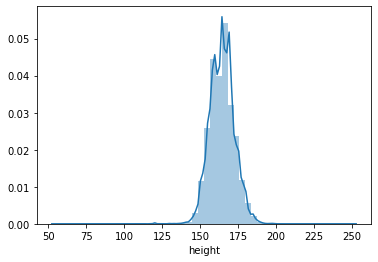

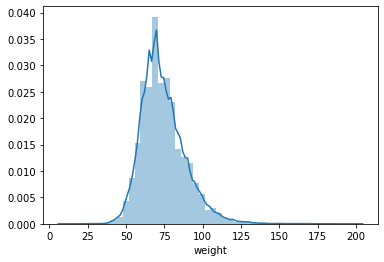

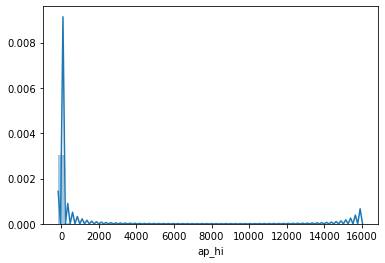

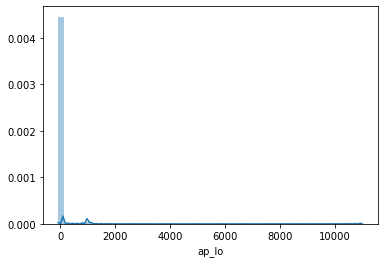

In [34]:
for i in cont_data:
    plot_dist(i,data)

In [35]:
#The columns 'age' is in days format let's convert in to meaningful data
data['age_data']=data['age']/365

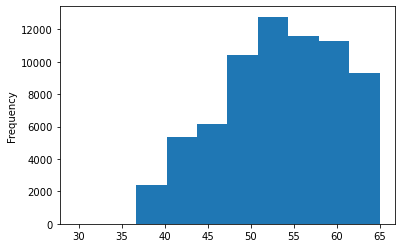

In [36]:
#Vusialize the age column
data['age_data'].plot.hist()

In [37]:
#Drop the 'id' column in datset
data=data.drop(columns=['age','id'],axis=1)

In [38]:
# Get the complete details about the data
#Create a class object

class dataframe_object():
    def __init__(self):
        print('DataFrame Object is created')
        
    def Data_information(self,data):
        
        data_info=pd.DataFrame(columns=['No of observations',
                                       'No of variables',
                                       'No of Numerical variables',
                                       'No of Categorical variables',
                                       'No of Factor variables',
                                       'No of zero variance variables',
                                       'No of Logical variables',
                                       'No of date variables'])
        
        data_info.loc[0,'No of observations']=data.shape[0]
        data_info.loc[0,'No of variables']=data.shape[1]
        data_info.loc[0,'No of Numerical variables']=data._get_numeric_data().shape[1]
        data_info.loc[0,'No of Categorical variables']=data.select_dtypes(include='object').shape[1]
        data_info.loc[0,'No of Factor variables']=data.select_dtypes(include='category').shape[1]
        data_info.loc[0,'No of zero variance variables']=data.loc[:,data.apply(pd.Series.nunique)==1].shape[1]
        data_info.loc[0,'No of Logical variables']=data.select_dtypes(include='bool').shape[1]
        data_info.loc[0,'No of date variables']=data.select_dtypes(include='datetime64').shape[1]
        
        data_info=data_info.transpose()
        data_info.columns=['Value']
        
        return data_info

In [39]:
data_obj=dataframe_object()

DataFrame Object is created


In [40]:
data_obj.Data_information(data)

,Value
No of observations,69301
No of variables,12
No of Numerical variables,12
No of Categorical variables,0
No of Factor variables,0
No of zero variance variables,0
No of Logical variables,0
No of date variables,0


In [41]:
#get the outlier count

class outlier_data():
    def __init__(self):
        print('Outlier object is created')
        
    def iqr_(self,x):
        """This is a private method gives you as inter quartile range
        """
        return x.quantile(q=0.75)-x.quantile(q=0.25)
    
    def outlier_count(self,x):
        """This is a private method gives you a outlier count in each variable
        """
        upper_out=x.quantile(q=0.75)+ 1.5*self.iqr_(x)
        lower_out=x.quantile(q=0.25)- 1.5*self.iqr_(x)
        
        return len(x[x > upper_out]) + len(x[x < lower_out])
    
    def tab_data(self,data):
        
        num_data=data._get_numeric_data()
        df_num_data=pd.DataFrame()
        i=0
        for c in num_data:
            df_num_data.loc[c,'Outlier count']=self.outlier_count(num_data[c])
            i=i+1
        return df_num_data

In [42]:
out_data=outlier_data()

Outlier object is created


In [43]:
out_data.iqr_(data)

gender          1.000000
height         11.000000
weight         17.000000
ap_hi          20.000000
ap_lo          10.000000
cholesterol     1.000000
gluc            0.000000
smoke           0.000000
alco            0.000000
active          0.000000
cardio          1.000000
age_data       10.032877
dtype: float64

In [44]:
out_data.tab_data(data)

,Outlier count
gender,0.0
height,515.0
weight,1802.0
ap_hi,1419.0
ap_lo,4584.0
cholesterol,0.0
gluc,10416.0
smoke,6102.0
alco,3734.0
active,13584.0


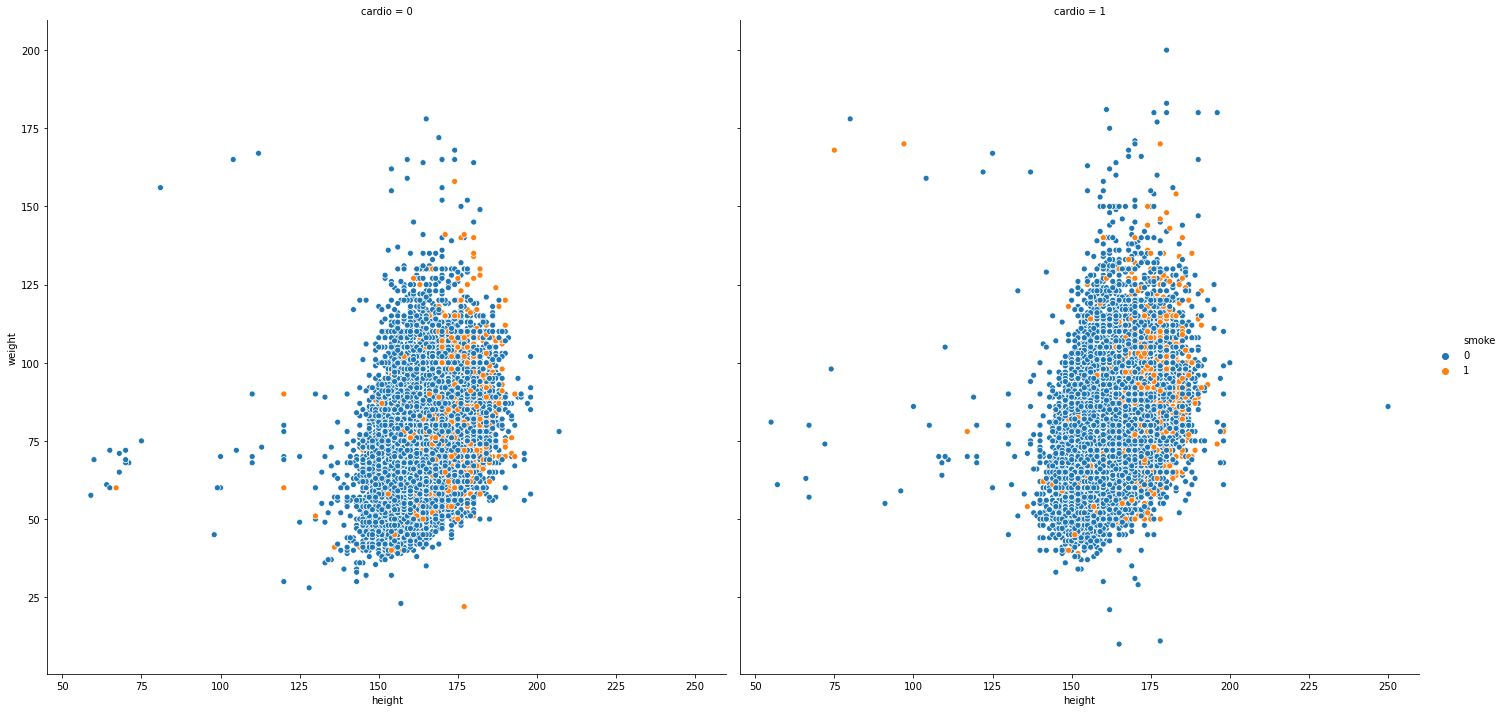

In [45]:
sns.relplot(x='height',y='weight',hue='smoke',col='cardio',data=data,col_wrap=2,height=10)
plt.show()

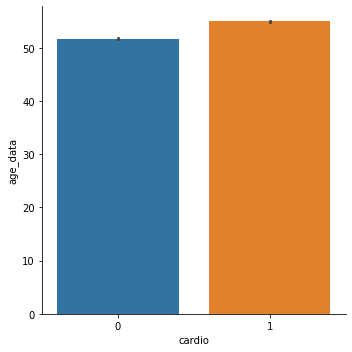

In [46]:
sns.catplot(x='cardio',y='age_data',data=data,kind='bar')
plt.show()

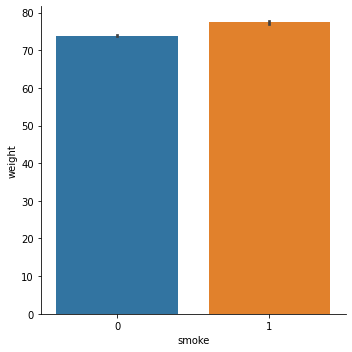

In [47]:
sns.catplot(x='smoke',y='weight',data=data,kind='bar')

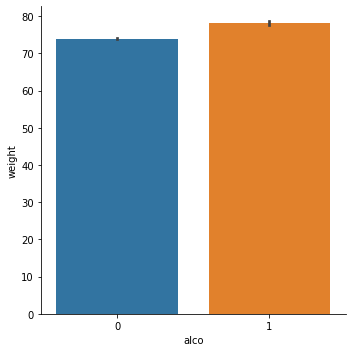

In [48]:
sns.catplot(x='alco',y='weight',data=data,kind='bar')

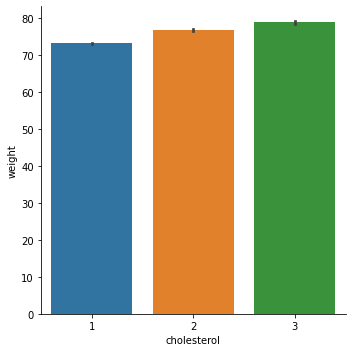

In [49]:
sns.catplot(x='cholesterol',y='weight',data=data,kind='bar')

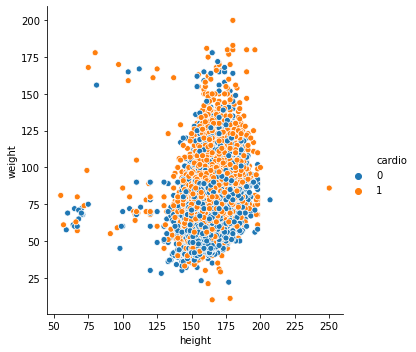

In [50]:
sns.relplot(x='height',y='weight',data=data,hue='cardio')

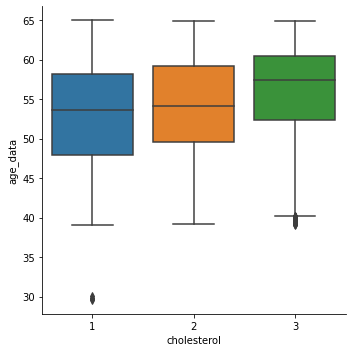

In [51]:
sns.catplot(x='cholesterol',y='age_data',data=data,kind='box')

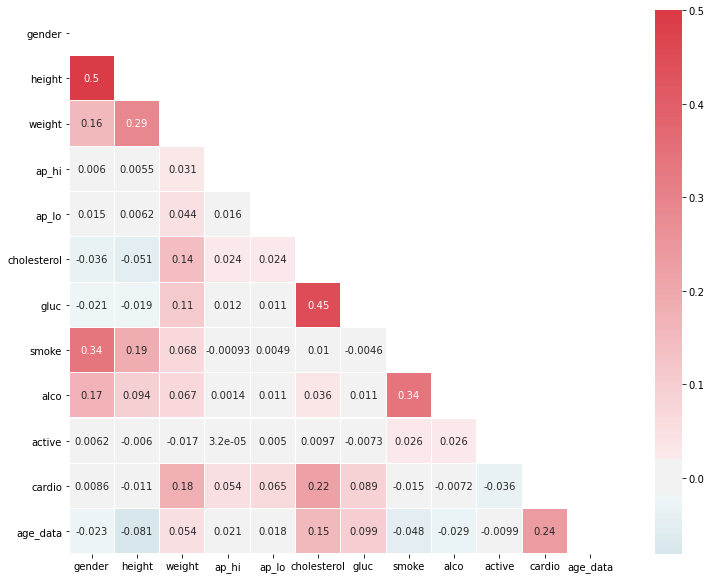

In [52]:
#Check correlation with heatmap
cmap=sns.diverging_palette(220,10,as_cmap=True)
plt.figure(figsize=(15,10))
corr=data.corr()
#Generate a mask
mask=np.triu(np.ones_like(corr,dtype=bool))

sns.heatmap(corr,annot=True,cmap=cmap,mask=mask,square=True,center=0,vmax=0.5,linewidths=0.05)
plt.show()

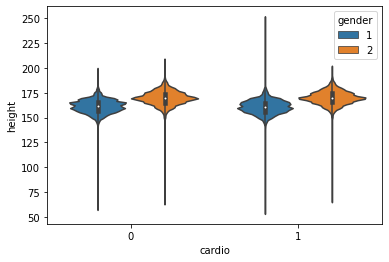

In [53]:
ax=sns.violinplot(x='cardio',y='height',data=data,hue='gender')

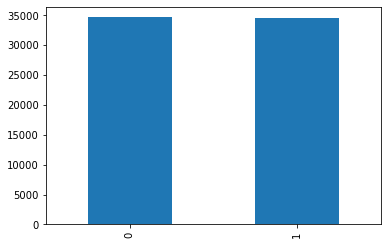

In [54]:
#Check the data is balanced or not
data['cardio'].value_counts().plot.bar()

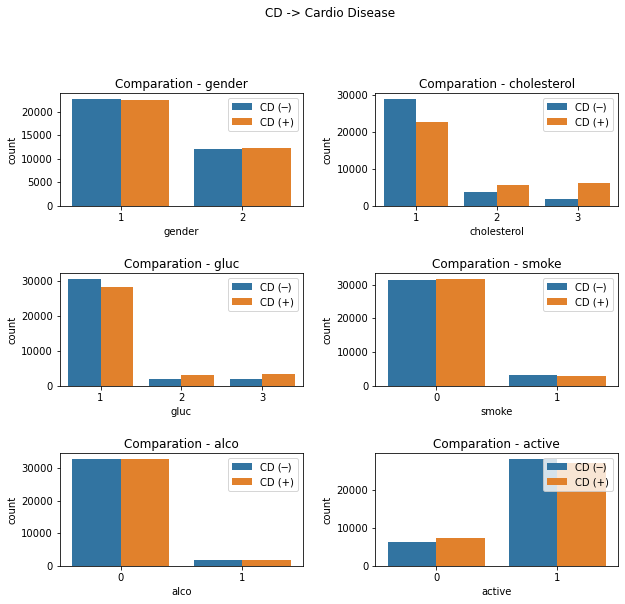

In [55]:
def habitPlot(dataframe, col):
    sns.countplot(x= col,
                  hue= 'cardio',
                  data= data)
    plt.title('Comparation - {}'.format(col))
    plt.legend(['CD (─)', 'CD (+)'],
               loc= 'upper right')

fig, ax = plt.subplots(figsize = (10, 12))
fig.suptitle('CD -> Cardio Disease')

plt.subplot(4,2,1)
habitPlot(data, 'gender')

plt.subplot(4,2,2)
habitPlot(data, 'cholesterol')

plt.subplot(4,2,3)
habitPlot(data, 'gluc')

plt.subplot(4,2,4)
habitPlot(data, 'smoke')

plt.subplot(4,2,5)
habitPlot(data, 'alco')

plt.subplot(4,2,6)
habitPlot(data, 'active')

plt.subplots_adjust(hspace= 0.6, wspace= 0.3)
plt.show()

#### 3.Feature Engineering

In [56]:
#Create a new column as BMI(Body mass index) which is calculated by (weight(kg)/height(m2))
data['height']=data['height']/100
data['BMI']=data['weight']/np.power(data['height'],2)

In [57]:
data.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_data,BMI
0,1,1.55,69.0,130,80,2,2,0,0,1,0,61.558904,28.720083
1,1,1.63,71.0,110,70,1,1,0,0,1,1,40.131507,26.722873
2,1,1.65,70.0,120,80,1,1,0,0,1,0,60.002740,25.711662
3,2,1.65,85.0,120,80,1,1,1,1,1,0,39.860274,31.221304
4,1,1.55,62.0,120,80,1,1,0,0,1,0,64.090411,25.806452


In [58]:
#Drop the height and weight columns from the dataset
data=data.drop(columns=['height','weight'],axis=1)

In [59]:
#Some value in the ap_i are -ve values we try to handle those values to make it more valuable
data['ap_hi']=data['ap_hi'].apply(lambda x: np.NaN if x <= 0 or x == 1 else x)

In [60]:
data['ap_lo']=data['ap_lo'].apply(lambda x: np.NaN if x <= 0 or x == 1 else x)

In [61]:
print('ap_hi------->','\n')
print('Mean of the ap_hi: {}'.format(data['ap_hi'].mean()))
print('Mode of the ap_hi: {}'.format(data['ap_hi'].mode()))
print('Median of the ap_hi: {}'.format(data['ap_hi'].median()))

ap_hi-------> 

Mean of the ap_hi: 128.85848294175375
Mode of the ap_hi: 0    120.0
dtype: float64
Median of the ap_hi: 120.0


In [62]:
print('ap_lo------->','\n')
print('Mean of the ap_lo: {}'.format(data['ap_lo'].mean()))
print('Mode of the ap_hi: {}'.format(data['ap_lo'].mode()))
print('Median of the ap_hi: {}'.format(data['ap_lo'].median()))

ap_lo-------> 

Mean of the ap_lo: 96.6831750339213
Mode of the ap_hi: 0    80.0
dtype: float64
Median of the ap_hi: 80.0


In [63]:
#Fill the null values in column 'ap_hi' & ap_lo with median
data['ap_hi']=data['ap_hi'].fillna(data['ap_hi'].median())
data['ap_lo']=data['ap_lo'].fillna(data['ap_lo'].median())

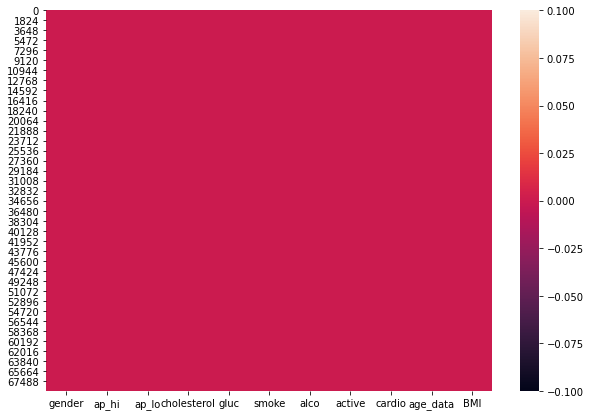

In [64]:
#Check any null values with heatmap
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull())

In [65]:
#Split the data in to x and y
x=data.drop('cardio',axis=1)
y=data['cardio']

In [66]:
print(x.shape,y.shape)

(69301, 10) (69301,)


#### 4. Feature Selection

In [67]:
#feature selection by chi2 methos
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

select=SelectKBest(score_func=chi2,k=10)
select.fit(x,y)

SelectKBest(score_func=<function chi2 at 0x000001F5B9C15430>)

In [68]:
best_select=pd.DataFrame(select.scores_,index=x.columns,columns=['Score'])

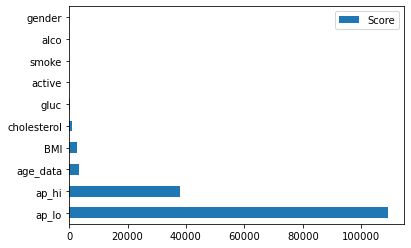

In [69]:
best_select.nlargest(10,'Score').plot.barh()

In [70]:
#Feature selection by ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
extra=ExtraTreesRegressor()
extra.fit(x,y)

ExtraTreesRegressor()

gender --> 0.014434053599184885
ap_hi --> 0.1673300903434572
ap_lo --> 0.10962655982659808
cholesterol --> 0.0480243016281961
gluc --> 0.020297187300333232
smoke --> 0.010759708255846876
alco --> 0.010129548497541567
active --> 0.009466414906207142
age_data --> 0.32494491140111587
BMI --> 0.2849872242415191


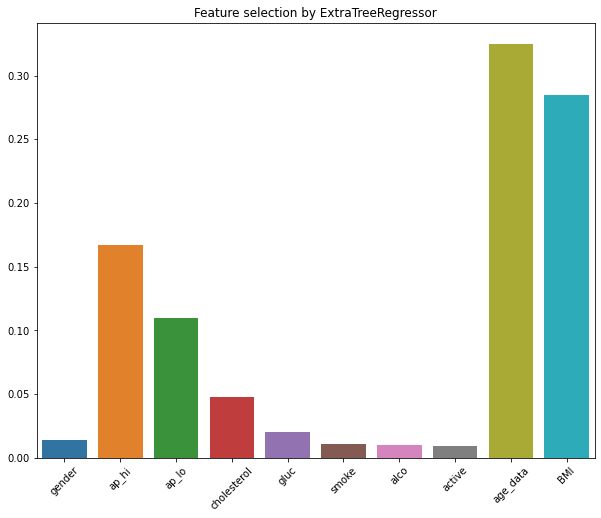

In [71]:
features=extra.feature_importances_
columns=x.columns
for i,j in enumerate(features):
    print(columns[i],"-->",j)
plt.figure(figsize=(10,8))
ax=sns.barplot([x for x in range(len(features))],features)
ax.set_xticklabels(x.columns,rotation=45)
ax.set_title('Feature selection by ExtraTreeRegressor')
plt.show()

gender --> 0.022019643
ap_hi --> 0.54912925
ap_lo --> 0.028741475
cholesterol --> 0.16405988
gluc --> 0.03517115
smoke --> 0.04548812
alco --> 0.034680184
active --> 0.04564015
age_data --> 0.050175544
BMI --> 0.024894644


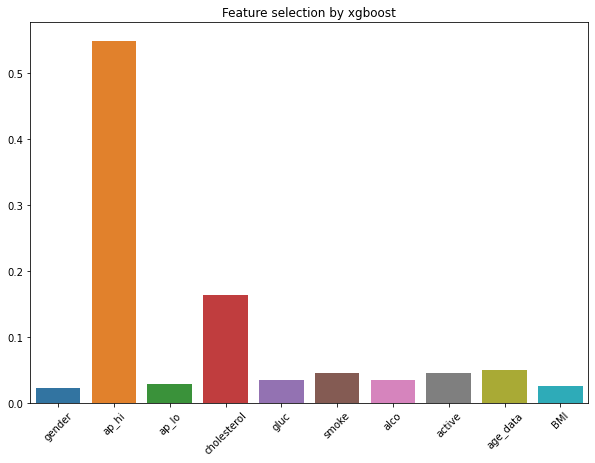

In [72]:
#Feature selection by xgboost
import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x,y)

features=xgb.feature_importances_
columns=x.columns
for i,j in enumerate(features):
    print(columns[i],'-->',j)
plt.figure(figsize=(10,7))
ax=sns.barplot([x for x in range(len(features))],features)
ax.set_title('Feature selection by xgboost')
ax.set_xticklabels(x.columns,rotation=45)
plt.show()

#### 5. Feature transformation

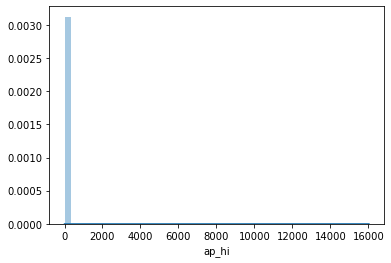

In [73]:
#The columns such as 'ap_hi' & 'ap_lo' the data is distribted only on one side we need to transfer those features in to uniform distribution
sns.distplot(x['ap_hi'])

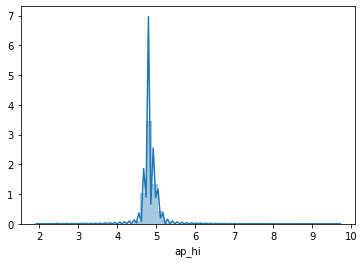

In [74]:
x['ap_hi']=np.log(x['ap_hi'])
sns.distplot(x['ap_hi'])

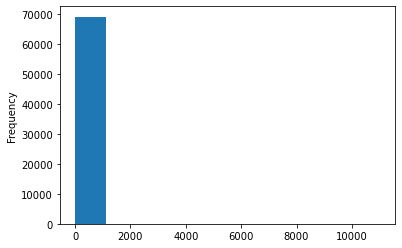

In [75]:
x['ap_lo'].plot.hist()

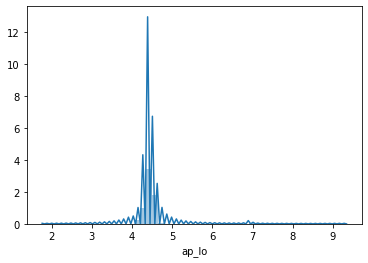

In [76]:
x['ap_lo']=np.log(x['ap_lo'])
sns.distplot(x['ap_lo'])

In [77]:
#Splitting the data in to train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=0)

In [78]:
print('X_train shape: ',x_train.shape)
print('X_test shape: ',x_test.shape)
print('Y_train shape: ',y_train.shape)
print('Y_test shape: ',y_test.shape)

X_train shape:  (58905, 10)
X_test shape:  (10396, 10)
Y_train shape:  (58905,)
Y_test shape:  (10396,)


#### 6. Model Building
In this session, we are going experiment with 7 algorithems.

##### Classification algorithems------>
1. Logistic Regression.
2. DecisionTreeClassifier.
3. KNeighborsClassifier.

##### Ensemle methods-------->
1. RandomForestClassifier
2. ExtraTreeClassifier.

##### Boosting Techniques-------->
1. Xgboost.
2. Adaboost.

In [79]:
#Import the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import cross_val_score,KFold,ShuffleSplit,StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
import warnings
warnings.simplefilter('ignore')

#### Classification Algorithems---------->
##### 1. Logistic Regression

In [80]:
log=LogisticRegression()
log.fit(x_train,y_train)
log_pred=log.predict(x_test)
log_pred[:9]

array([0, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [81]:
#Check the accuracy result for predicted output
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Accuracy Score: ',accuracy_score(y_test,log_pred))
print('Classification_report--->','\n',classification_report(y_test,log_pred))
print(confusion_matrix(y_test,log_pred))

Accuracy Score:  0.6388033859176606
Classification_report---> 
               precision    recall  f1-score   support

           0       0.62      0.71      0.66      5147
           1       0.67      0.57      0.61      5249

    accuracy                           0.64     10396
   macro avg       0.64      0.64      0.64     10396
weighted avg       0.64      0.64      0.64     10396

[[3644 1503]
 [2252 2997]]


#### 2. DecisionTreeClassifer


In [82]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
tree_pred=tree.predict(x_test)
tree_pred[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [83]:
print('Accuracy Score: ',accuracy_score(y_test,tree_pred))
print('Classification_report--->','\n',classification_report(y_test,tree_pred))
print(confusion_matrix(y_test,tree_pred))

Accuracy Score:  0.638611004232397
Classification_report---> 
               precision    recall  f1-score   support

           0       0.63      0.64      0.64      5147
           1       0.64      0.64      0.64      5249

    accuracy                           0.64     10396
   macro avg       0.64      0.64      0.64     10396
weighted avg       0.64      0.64      0.64     10396

[[3273 1874]
 [1883 3366]]


#### 3. KNearestNeighbor Classifier


In [84]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [85]:
knn_pred=knn.predict(x_test)
knn_pred[:9]

array([1, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [86]:
print('Accuracy Score: ',accuracy_score(y_test,knn_pred))
print('Classification_report--->','\n',classification_report(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))

Accuracy Score:  0.642170065409773
Classification_report---> 
               precision    recall  f1-score   support

           0       0.63      0.66      0.65      5147
           1       0.65      0.63      0.64      5249

    accuracy                           0.64     10396
   macro avg       0.64      0.64      0.64     10396
weighted avg       0.64      0.64      0.64     10396

[[3395 1752]
 [1968 3281]]


### Ensemble Methods

#### 1.RandomForestClassifier

In [87]:
random=RandomForestClassifier()
random.fit(x_train,y_train)
random_pred=random.predict(x_test)
random_pred[:9]

array([1, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [88]:
print('Accuracy Score: ',accuracy_score(y_test,random_pred))
print('Classification_report--->','\n',classification_report(y_test,random_pred))
print(confusion_matrix(y_test,random_pred))

Accuracy Score:  0.7053674490188534
Classification_report---> 
               precision    recall  f1-score   support

           0       0.70      0.71      0.71      5147
           1       0.71      0.70      0.70      5249

    accuracy                           0.71     10396
   macro avg       0.71      0.71      0.71     10396
weighted avg       0.71      0.71      0.71     10396

[[3674 1473]
 [1590 3659]]


In [89]:
extra=ExtraTreesClassifier()
extra.fit(x_train,y_train)
extra_pred=extra.predict(x_test)
extra_pred[:9]

array([1, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [90]:
print('Accuracy Score: ',accuracy_score(y_test,extra_pred))
print('Classification_report--->','\n',classification_report(y_test,extra_pred))
print(confusion_matrix(y_test,extra_pred))

Accuracy Score:  0.693632166217776
Classification_report---> 
               precision    recall  f1-score   support

           0       0.69      0.69      0.69      5147
           1       0.70      0.69      0.70      5249

    accuracy                           0.69     10396
   macro avg       0.69      0.69      0.69     10396
weighted avg       0.69      0.69      0.69     10396

[[3570 1577]
 [1608 3641]]


### Boosting Techniques

#### 1. Xgboost

In [91]:
import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
xgb_pred=xgb.predict(x_test)
xgb_pred[:8]

array([1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [92]:
print('Accuracy Score: ',accuracy_score(y_test,xgb_pred))
print('Classification_report--->','\n',classification_report(y_test,xgb_pred))
print(confusion_matrix(y_test,xgb_pred))

Accuracy Score:  0.7358599461331281
Classification_report---> 
               precision    recall  f1-score   support

           0       0.72      0.77      0.74      5147
           1       0.76      0.70      0.73      5249

    accuracy                           0.74     10396
   macro avg       0.74      0.74      0.74     10396
weighted avg       0.74      0.74      0.74     10396

[[3988 1159]
 [1587 3662]]


#### 2. Adaboost

In [93]:
ada_boost=AdaBoostClassifier()
ada_boost.fit(x_train,y_train)
ada_pred=ada_boost.predict(x_test)
ada_pred[:9]

array([1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [94]:
print('Accuracy Score: ',accuracy_score(y_test,ada_pred))
print('Classification_report--->','\n',classification_report(y_test,ada_pred))
print(confusion_matrix(y_test,ada_pred))

Accuracy Score:  0.7311465948441709
Classification_report---> 
               precision    recall  f1-score   support

           0       0.70      0.80      0.75      5147
           1       0.77      0.67      0.71      5249

    accuracy                           0.73     10396
   macro avg       0.74      0.73      0.73     10396
weighted avg       0.74      0.73      0.73     10396

[[4098 1049]
 [1746 3503]]


In [95]:
grad=GradientBoostingClassifier()
grad.fit(x_train,y_train)
grad_pred=grad.predict(x_test)
grad_pred[:9]

array([1, 0, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

In [96]:
print('Accuracy Score: ',accuracy_score(y_test,grad_pred))
print('Classification_report--->','\n',classification_report(y_test,grad_pred))
print(confusion_matrix(y_test,grad_pred))

Accuracy Score:  0.7351866102347057
Classification_report---> 
               precision    recall  f1-score   support

           0       0.72      0.77      0.74      5147
           1       0.76      0.70      0.73      5249

    accuracy                           0.74     10396
   macro avg       0.74      0.74      0.74     10396
weighted avg       0.74      0.74      0.73     10396

[[3954 1193]
 [1560 3689]]


### lightbgm

In [97]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
light=LGBMClassifier()
light.fit(x_train,y_train)
light_pred=light.predict(x_test)
light_pred[:9]

array([1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [98]:
print('Accuracy Score: ',accuracy_score(y_test,light_pred))
print('Classification_report--->','\n',classification_report(y_test,light_pred))
print(confusion_matrix(y_test,light_pred))

Accuracy Score:  0.7351866102347057
Classification_report---> 
               precision    recall  f1-score   support

           0       0.71      0.78      0.74      5147
           1       0.76      0.70      0.73      5249

    accuracy                           0.74     10396
   macro avg       0.74      0.74      0.73     10396
weighted avg       0.74      0.74      0.73     10396

[[3992 1155]
 [1598 3651]]


### With Standardization

In [101]:
x=data.drop('cardio',1)
y=data['cardio']

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=42)

In [103]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [104]:
print('Logistic Regression------------>','\n')

log=LogisticRegression()
log.fit(x_train,y_train)
log_pred=log.predict(x_test)
log_pred[:9]

print('Accuracy Score: ',accuracy_score(y_test,log_pred))
print('Classification_report--->','\n',classification_report(y_test,log_pred))
print(confusion_matrix(y_test,log_pred))
print('*'*50)

print('DecisionTreeClassifier------------>','\n')
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
tree_pred=tree.predict(x_test)
tree_pred[:10]

print('Accuracy Score: ',accuracy_score(y_test,tree_pred))
print('Classification_report--->','\n',classification_report(y_test,tree_pred))
print(confusion_matrix(y_test,tree_pred))
print('*'*50)

print('KNeighborsClassifier------------->','\n')
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
knn_pred[:9]

print('Accuracy Score: ',accuracy_score(y_test,knn_pred))
print('Classification_report--->','\n',classification_report(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))
print('*'*50)

print('RandomForestClassifier------------>','\n')
random=RandomForestClassifier()
random.fit(x_train,y_train)
random_pred=random.predict(x_test)
random_pred[:9]

print('Accuracy Score: ',accuracy_score(y_test,random_pred))
print('Classification_report--->','\n',classification_report(y_test,random_pred))
print(confusion_matrix(y_test,random_pred))
print('*'*50)

print('ExtraTreeClassifier-------------->','\n')
extra=ExtraTreesClassifier()
extra.fit(x_train,y_train)
extra_pred=extra.predict(x_test)
extra_pred[:9]

print('Accuracy Score: ',accuracy_score(y_test,extra_pred))
print('Classification_report--->','\n',classification_report(y_test,extra_pred))
print(confusion_matrix(y_test,extra_pred))
print('*'*50)

print('XGBoost---------------->','\n')
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
xgb_pred=xgb.predict(x_test)
xgb_pred[:8]

print('Accuracy Score: ',accuracy_score(y_test,xgb_pred))
print('Classification_report--->','\n',classification_report(y_test,xgb_pred))
print(confusion_matrix(y_test,xgb_pred))
print('*'*50)

print('Adaboost--------------->','\n')
ada_boost=AdaBoostClassifier()
ada_boost.fit(x_train,y_train)
ada_pred=ada_boost.predict(x_test)
ada_pred[:9]

print('Accuracy Score: ',accuracy_score(y_test,ada_pred))
print('Classification_report--->','\n',classification_report(y_test,ada_pred))
print(confusion_matrix(y_test,ada_pred))
print('*'*50)

print('GradientBossting--------------->','\n')
grad=GradientBoostingClassifier()
grad.fit(x_train,y_train)
grad_pred=grad.predict(x_test)
grad_pred[:9]

print('Accuracy Score: ',accuracy_score(y_test,grad_pred))
print('Classification_report--->','\n',classification_report(y_test,grad_pred))
print(confusion_matrix(y_test,grad_pred))
print('*'*50)

print('Lightgbm------------->','\n')
light=LGBMClassifier()
light.fit(x_train,y_train)
light_pred=light.predict(x_test)
light_pred[:9]

print('Accuracy Score: ',accuracy_score(y_test,light_pred))
print('Classification_report--->','\n',classification_report(y_test,light_pred))
print(confusion_matrix(y_test,light_pred))

Logistic Regression------------> 

Accuracy Score:  0.7222008464794152
Classification_report---> 
               precision    recall  f1-score   support

           0       0.71      0.76      0.73      5206
           1       0.74      0.68      0.71      5190

    accuracy                           0.72     10396
   macro avg       0.72      0.72      0.72     10396
weighted avg       0.72      0.72      0.72     10396

[[3981 1225]
 [1663 3527]]
**************************************************
DecisionTreeClassifier------------> 

Accuracy Score:  0.6336090804155444
Classification_report---> 
               precision    recall  f1-score   support

           0       0.63      0.63      0.63      5206
           1       0.63      0.64      0.63      5190

    accuracy                           0.63     10396
   macro avg       0.63      0.63      0.63     10396
weighted avg       0.63      0.63      0.63     10396

[[3291 1915]
 [1894 3296]]
****************************************

from the above models, We can see that the boosting algorithems gives better accuracy as compared to the other algorithems, let's hypertune the model.

### HyperParameter Tuning

In [105]:
#Parameters of xgboost
params={
 "learning_rate"    : [0.001,0.002,0.01,0.02,0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [106]:
params

{'learning_rate': [0.001, 0.002, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}

In [109]:
xgb=XGBClassifier()
random_hyp=RandomizedSearchCV(estimator=xgb,param_distributions=params,cv=10,n_jobs=-1,verbose=3,n_iter=10,scoring='roc_auc')

In [110]:
random_hyp.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.9min finished


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [111]:
random_hyp.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [112]:
random_hyp.best_params_

{'min_child_weight': 3,
 'max_depth': 3,
 'learning_rate': 0.15,
 'gamma': 0.3,
 'colsample_bytree': 0.5}

In [113]:
best_random_score=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=5, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [114]:
score=cross_val_score(best_random_score,x,y,cv=10)

In [115]:
score.mean()

0.7363242041787705